# Probability

Red($R$) and Blue($B$) Baskets with oranges($o$), apples($a$)

$$\begin{aligned}p(R) &= 0.4, p(B) = 0.6 \\
p(o) &= p(a) = 0.5 \end{aligned}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7877)
len_y = 3
len_x = 5
coord = np.array([[(-y, x) for x in np.arange(len_x+1)] for y in np.arange(len_y+1)])
box = np.ones((len_y, len_x))

In [2]:
co_x = np.arange(len_x+1)
co_y = np.arange(len_y+1)

In [9]:
box2 = box.copy()
box2[0, 0] = 0

In [17]:
box + 1

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

[]

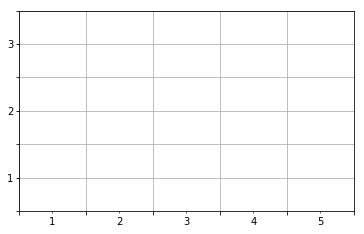

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.tick_params(axis="x", bottom=True, labelbottom=True)
ax.set_xticks(co_x+0.5, minor=True)
ax.set_xticklabels(co_x+1, minor=True)
ax.set_yticks(co_y+0.5, minor=True)
ax.set_yticklabels(co_y+1, minor=True)
ax.set_aspect("equal")
ax.grid(True)
ax.set_xlim(0, 5)
ax.set_ylim(0, 3)
ax.set_xticklabels([])
ax.set_yticklabels([])

In [26]:
co_x

array([0, 1, 2, 3, 4, 5])

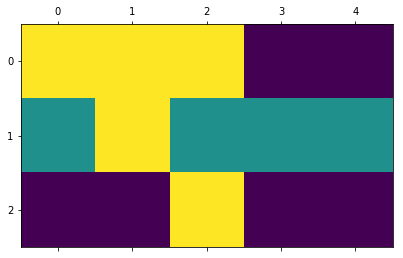

In [38]:
box = np.random.randint(1, 4, size=(3, 5))
plt.matshow(box)
for (i, j), z in np.ndenumerate(box):
    ax.text(j, i, '{:d}'.format(int(z)), ha='center', va='center')

In [2]:
# joint prob
def joint_prob(i, j, box):
    N = box.size
    n_ij = box[j, i]    
    return n_ij / N

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [14]:
coord = [[(y, x) for x in np.arange(len_x)] for y in np.arange(len_y)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]]